In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle


In [2]:
# #############################################################################
# Real benchmarked dataset
data = pd.read_csv('../../RealData/RealData_nginx_small.csv')
#data = pd.read_csv('../../RealData/RealData_haproxy_big.csv')

## Log Syn. Data
#data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')




In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit regression model

clf = SVR(kernel='rbf')
svr_lin = GridSearchCV(clf, {'C': [1000, 20000], 'coef0': [0, 1]}, verbose=1, n_jobs=-1, cv=10)
svr_lin.fit(X_train, y_train)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.9s finished
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1000, 20000], 'coef0': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [5]:
prediction = svr_lin.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.1,0.012958
1,0.1,0.035667
2,0.1,0.039809
3,0.1,0.031143
4,0.1,0.021465
5,0.1,0.023355
6,0.1,0.013644
7,0.1,0.032908
8,0.1,0.012765
9,0.1,0.026949


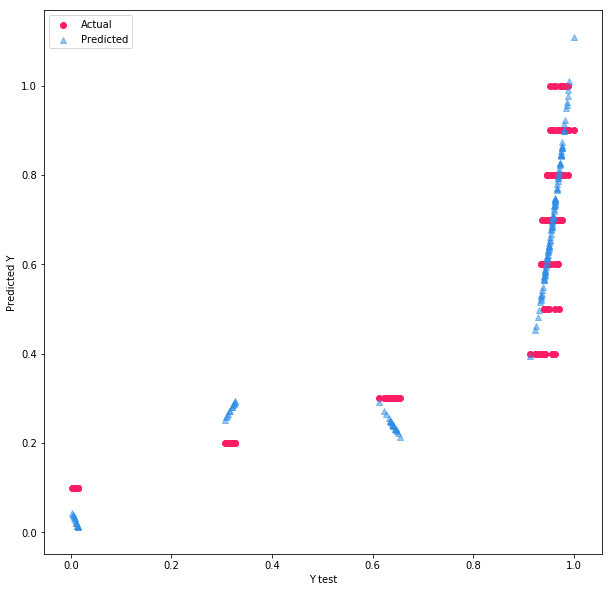

In [6]:
#Plot prediction
fig = plt.figure(figsize=(10, 10))

plt.scatter(X_test, y_test,  color='#fe1c64',label="Actual")
plt.scatter(X_test, prediction, color='#2e8de6', linewidth=1,marker='^',alpha = 0.5,label="Predicted")
plt.xlabel("Y test")
plt.ylabel("Predicted Y")
plt.legend()

In [7]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2:',metrics.r2_score(y_test, prediction))



MAE: 0.09603043429006525
MSE: 0.013924835708808442
RMSE: 0.11800354108588625
R^2: 0.822591487722151


In [8]:
# save the model to disk
filename = '../models/SVM_haproxy_big_model.sav'
pickle.dump(svr_lin, open(filename, 'wb'))

In [9]:
svr_lin.predict([[0.2243476]])

array([0.07514504])